<a href="https://colab.research.google.com/github/ashamril/FYP-RUS_GWO_PSO_Machine_Learning/blob/master/3a_SGCC_PSO_Classification_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Electricity fraud prediction using supervised machine learning
# ANN, SVM, XGBoost and RF
# Undersampling/balancing using Particle Swarm Optimization (PSO)
# Author  : Ami
# Email   : ashamril@gmail.com

from datetime import datetime 
from google.colab import drive
from pytz import timezone  
from random import randint
from scipy import spatial
from scipy.stats import zscore
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, average_precision_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.spatial
import seaborn as sns
import time
import warnings 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !wget -O sgcc_dataset.csv https://www.dropbox.com/s/qoijcmitc881tkv/sgcc-no-missing-values-v4.csv?dl=0                    # Set1
# #!wget -O sgcc_dataset.csv https://raw.githubusercontent.com/ashamril/CSV/master/sgcc-no-missing-values_df_months.csv     # Set2

In [ ]:
malaysia = timezone('Asia/Kuala_Lumpur')
mytime = datetime.now(malaysia)
first_start_time = datetime.now() 
start_time = datetime.now() 
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values-v4.csv"                             # Set1
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_no-outliers-quantile.csv"           # Set2
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_no-outliers-zscore.csv"             # Set3
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_RobustScaler.csv"                   # Set4
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_df_months.csv"                      # Set5
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_QuantileTransformer_normal.csv"     # Set6
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_QuantileTransformer_uniform.csv"    # Set7
#file_path = "/content/drive/My Drive/data/CSV/blood_transfusion.csv"                                     # Set8
#file_path = "/content/drive/My Drive/data/CSV/sgcc-no-missing-values_PowerTransformer.csv"               # Set9
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_25percent_zero.csv"                     # Set10
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_50percent_zero.csv"                     # Set11
file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_with_zero.csv"                           # Set12
#file_path = "/content/drive/My Drive/data/CSV/sgcc_dataset_clean_90percent_zero.csv"                     # Set13
dataset_ori = pd.read_csv(file_path)
print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

dataset_set = "Set12"
program_name = "PSO"

Time elapsed (hh:mm:ss.ms) 0:00:03.645996


In [ ]:
dataset_ori

,Unnamed: 0,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,...,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31,CONS_NO
0,0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74,0387DD8A07E07FDA6271170F86AD9151
1,1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,...,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72,EDFC78B07BA2908B3395C4EB2304665E
2,2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,...,1.60,5.10,2.41,2.70,3.04,4.33,2.46,3.19,4.76,3.13,5.86,2.92,3.07,3.72,0.74,2.68,2.02,1.61,1.19,1.06,1.65,1.08,0.38,0.00,0.89,0.49,2.49,1.30,1.25,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40,34C1954AA3703C4F8BD8EAEA7C4B7B83
3,3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,...,2.75,3.98,3.25,3.73,4.46,2.36,2.82,3.70,7.36,10.00,8.90,9.26,3.74,4.10,4.42,3.03,2.70,3.02,2.69,2.82,3.13,3.11,3.86,2.87,3.67,2.93,2.93,2.64,3.55,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91,768309B0EB11FD436CEE5ABFB84F4C0C
4,4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,...,49.42,74.46,66.50,70.37,71.43,51.36,52.39,60.89,57.53,57.05,60.20,58.41,60.13,54.07,62.53,71.43,46.58,41.68,41.93,41.08,37.08,46.15,43.90,47.25,51.28,53.23,50.09,59.46,62.55,64.11,84.89,60.86,52.67,49.43,57.22,56.68,45.28,44.04,43.36,516954F5FF177CE314656D727FCC66A5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.39,2.04,1.00,1.10,0.90,1.32,1.33,0.95,0.90,1.31,0.98,1.28,0.95,0.87,1.42,0.97,1.03,1.32,1.08,1.34,1.23,0.82,1.38,2.94,1.00,1.19,1.29,1.36,0.93,1.46,1.30,1.56,1.51,1.15,1.30,1.50,0.88,1.35,1.50,8C32EE3B1C2B5EAFC0DCCCD4700BD5FF
23845,23846,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0

In [ ]:
# malaysia = timezone('Asia/Kuala_Lumpur')
# mytime = datetime.now(malaysia)
# first_start_time = datetime.now() 
# start_time = datetime.now() 
# dataset_ori = pd.read_csv('/content/sgcc_dataset.csv')
# print('Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

# dataset_set = "Set1"
# program_name = "GWO"

In [ ]:
# Drop Unnamed and CONS_NO columns
dataset = dataset_ori.iloc[:,1:-1]
dataset

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,1,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,8.30,...,8.56,10.48,8.20,12.53,7.90,8.58,10.12,9.96,7.60,18.19,10.93,11.41,19.92,10.70,9.20,6.77,6.76,6.15,6.50,8.08,7.97,8.81,7.37,11.72,11.02,8.18,7.33,6.71,8.52,6.31,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,3.53,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,0.88,3.81,6.51,9.19,7.79,7.02,7.25,6.37,6.43,7.89,7.46,7.95,7.59,4.84,6.06,5.60,6.72,7.29,5.60,6.28,6.73,...,9.56,9.48,10.60,10.06,10.79,10.91,17.77,10.37,13.51,14.13,17.44,15.96,12.18,18.54,13.44,11.68,9.15,9.16,10.19,10.31,8.03,10.08,10.34,11.24,15.14,14.36,12.39,10.36,9.29,7.91,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
2,1,0.11,0.11,0.25,0.27,0.21,0.20,0.14,0.34,0.23,0.53,0.45,0.51,1.32,0.71,0.12,0.52,0.55,0.74,0.92,1.37,1.81,1.12,1.00,0.75,2.17,2.87,1.12,1.41,1.73,1.54,1.15,1.60,1.99,1.44,1.79,1.86,1.99,2.06,3.02,...,2.16,1.60,5.10,2.41,2.70,3.04,4.33,2.46,3.19,4.76,3.13,5.86,2.92,3.07,3.72,0.74,2.68,2.02,1.61,1.19,1.06,1.65,1.08,0.38,0.00,0.89,0.49,2.49,1.30,1.25,1.85,3.36,1.45,2.12,1.55,1.18,1.13,1.34,1.26,1.40
3,1,0.91,1.16,0.75,1.30,0.74,0.94,0.85,1.21,1.17,0.86,1.10,0.66,5.82,3.17,1.18,4.05,3.66,3.21,4.83,5.92,3.99,1.45,1.39,2.06,0.89,5.87,2.96,3.30,2.44,4.57,6.44,5.61,5.97,4.25,10.92,15.02,4.34,2.59,1.02,...,3.19,2.75,3.98,3.25,3.73,4.46,2.36,2.82,3.70,7.36,10.00,8.90,9.26,3.74,4.10,4.42,3.03,2.70,3.02,2.69,2.82,3.13,3.11,3.86,2.87,3.67,2.93,2.93,2.64,3.55,3.55,3.22,3.06,3.97,2.79,3.82,2.75,2.96,3.67,2.91
4,1,11.02,7.92,8.41,9.66,9.86,8.32,8.21,7.88,10.17,8.24,7.94,7.92,8.31,7.39,8.27,8.05,8.95,8.32,6.41,7.11,7.14,7.20,6.29,7.64,6.70,7.45,5.06,3.40,3.88,5.26,5.22,4.48,5.71,4.36,4.50,4.48,4.01,6.07,5.57,...,62.96,49.42,74.46,66.50,70.37,71.43,51.36,52.39,60.89,57.53,57.05,60.20,58.41,60.13,54.07,62.53,71.43,46.58,41.68,41.93,41.08,37.08,46.15,43.90,47.25,51.28,53.23,50.09,59.46,62.55,64.11,84.89,60.86,52.67,49.43,57.22,56.68,45.28,44.04,43.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23844,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.34,1.39,2.04,1.00,1.10,0.90,1.32,1.33,0.95,0.90,1.31,0.98,1.28,0.95,0.87,1.42,0.97,1.03,1.32,1.08,1.34,1.23,0.82,1.38,2.94,1.00,1.19,1.29,1.36,0.93,1.46,1.30,1.56,1.51,1.15,1.30,1.50,0.88,1.35,1.50
23845,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,152.39,158.13,229.34,226.53,188.67,251.22,223.88,184.34,205.44,290.41,268.83,291.32

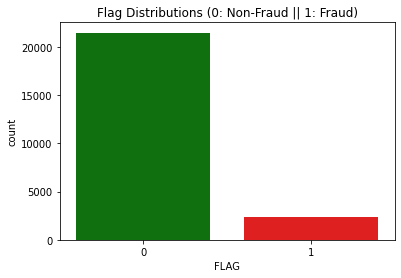

Original dataset:
No Frauds 89.93 % of the dataset: 21447
Frauds 10.07 % of the dataset: 2402


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ["green", "red"]
sns.countplot('FLAG', data=dataset, palette=colors)
plt.title('Flag Distributions (0: Non-Fraud || 1: Fraud)')

plt.show()

print("Original dataset:")
print('No Frauds', round(dataset['FLAG'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset:', dataset['FLAG'].value_counts()[0])
print('Frauds', round(dataset['FLAG'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset:', dataset['FLAG'].value_counts()[1])

In [ ]:
# Separating the dependent and independent variables 

X = dataset.drop('FLAG', axis = 1) 
#X = X.drop('Total_Consumption', axis = 1) 
y = dataset['FLAG'] 

In [ ]:
# # Separating train, validation and test set then undersample with PSO 

# # Separating train, validation and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=59)

# print("Before undersample PSO:")
# print("X_train:", X_train.shape, "Flag 1: ", y_train[y_train == 1].count(), "Flag 0: ", y_train[y_train == 0].count())
# print("X_test:", X_test.shape, "Flag 1: ", y_test[y_test == 1].count(), "Flag 0: ", y_test[y_test == 0].count())

In [ ]:
# # PSO undersampling using MAX distance

# # Create 2 separate df for FLAG = 0 and 1
# df_train =  X_train.copy()
# df_train['FLAG'] = y_train

# df_scaled_flag0 =  df_train[df_train.FLAG == 0]
# df_scaled_flag1 =  df_train[df_train.FLAG == 1]

# # Count total of FLAG 0 and 1
# cnt_flag0 = df_scaled_flag0[df_scaled_flag0.FLAG == 0].count()[0]
# cnt_flag1 = df_scaled_flag1[df_scaled_flag1.FLAG == 1].count()[0]

# start_time = datetime.now() 
# # PSO variables
# max_particles_position = cnt_flag0
# #max_particles_position = 100
# swarm_size = 30 # number of particles
# row = 0
# n_rows = int(round(cnt_flag1/2, 0))
# #n_rows = 5
# iteration = 0
# n_iterations = 10
# euc_distance = 0
# fitness_candidate = 0
# target = 1
# target_error = 1e-6

# # Variables to calculate the velocity
# #W = 0.5
# #c1 = 0.5
# #c2 = 0.9
# W = 0.9
# c1 = 0.5
# c2 = 0.3

# df_scaled_flag0_gbest_final = pd.DataFrame([])

# print(mytime)
# print("Rows: ", n_rows, " ", "Max Particle Position/Flag0: ", max_particles_position, " ", "Flag1: ", cnt_flag1, " ", "No of Particles: ", swarm_size, " ", "No of Iteration: ", n_iterations)
# while row < n_rows:
#   start_time2 = datetime.now() 
#   ###print("Row: ", row, " ", "Max Particle Position: ", max_particles_position, " ", "No of Particles: ", swarm_size, " ", "No of Iteration: ", n_iterations) 

# # Define the fitness function. Calculate the distance between 2 rows using Euclidean Distance
#   def fitness_function(position):
#     #distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='euclidean')
#     distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='minkowski')
#     #distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='jaccard')
#     distance = np.round(distance, 2)
#     return(distance[0])

# # Set velocity initial value 
#   velocity_vector = ([np.array([0, 0]) for _ in range(swarm_size)])

# # Generate number ranging between 0 to max_particles_position for 2 dimensions of an array
#   particle_position_vector = np.random.randint(max_particles_position, size=(swarm_size, 2))

# # Set initial particle position, initial pbest position and value, initial gbest and value
#   pbest_position = particle_position_vector
#   pbest_fitness_value = np.array([float() for _ in range(swarm_size)])
#   gbest_fitness_value = float()
#   gbest_position = np.array([float('inf'), float('inf')])
#   best_iteration = np.array(float('inf'))
#   pbest_final = np.array([])
#   gbest_final = np.array([])

#   iteration = 0
#   while iteration < n_iterations:
#     #print("Iteration ", iteration) 

#     for i in range(swarm_size):
#         fitness_candidate = fitness_function(particle_position_vector[i])
#         #print(fitness_candidate, ' ', particle_position_vector[i], ' ', "iteration = ", iteration)
        
#         if (fitness_candidate == 0.):
#             #print("Fitness value equal", fitness_candidate, ' ', "Iteration = ", iteration)
#             fitness_candidate = pbest_fitness_value[i]
        
#         if (pbest_fitness_value[i] < fitness_candidate):
#             pbest_fitness_value[i] = fitness_candidate
#             pbest_position[i] = particle_position_vector[i]
#             pbest_result = np.array((pbest_position[i]))
#             pbest_final = np.append(pbest_final, pbest_result)
#             #print("Pbest =", pbest_fitness_value[i], ' ', "Pbest Position =", pbest_position[i], ' ', "Iterarion No =", iteration)

# # The maximum distance value - Gbest
#         if (gbest_fitness_value < fitness_candidate):
#             gbest_fitness_value = fitness_candidate
#             gbest_position = particle_position_vector[i]
#             best_iteration = iteration
#             gbest_result = np.array((gbest_position))
#             gbest_final = np.append(gbest_final, gbest_result)
#             #print("Gbest =", gbest_fitness_value, ' ', "Gbest Position =", gbest_position, ' ', "Iteration No =", iteration)
           
#     if (abs(gbest_fitness_value - target) < target_error):
#         break
        
#     for i in range(swarm_size):
#         new_velocity = (W * velocity_vector[i]) + (c1 * random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2 *random.random()) * (gbest_position - particle_position_vector[i])
#         new_position = new_velocity + particle_position_vector[i]
#         new_position = abs(np.round(new_position, 0))
#         particle_position_vector[i] = new_position

#     iteration = iteration + 1

#   elapsed_time = datetime.now() - start_time2
#   ###print("============================================================================================")
#   print("The best position is", gbest_position,". The gbest value is", gbest_fitness_value, "in iteration number", best_iteration, "in", elapsed_time)       
#   ###print("============================================================================================")
#   #print("Gbest position", gbest_final)
#   #print("=======================================================================================")
#   #print("Pbest position", pbest_final)

# # Create new df from Gbest positions 
#   df_scaled_flag0_gbest = pd.DataFrame.append(df_scaled_flag0.iloc[[gbest_position[0]]], df_scaled_flag0.iloc[[gbest_position[1]]])
#   df_scaled_flag0_gbest_final = df_scaled_flag0_gbest_final.append(df_scaled_flag0_gbest)

# # Remove the rows of the Gbest positions from the df
#   df_scaled_flag0 = df_scaled_flag0.drop([df_scaled_flag0.index[gbest_position[0]], df_scaled_flag0.index[gbest_position[1]]])
#   #df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[gbest_position[1]])

#   cnt_flag0 = df_scaled_flag0.shape[0]

#   cnt_df_scaled_flag0_gbest_final = df_scaled_flag0_gbest_final.shape[0]
#   ###print("df_scaled_flag0_gbest_final rows: ", cnt_df_scaled_flag0_gbest_final, "/", cnt_flag1)

#   #if (cnt_df_scaled_flag0_gbest_final == cnt_flag1):
#     #break
  
#   # Number of particles minus the dropped rows
#   max_particles_position = max_particles_position - 2
#   row = row + 1
#   ###print('PSO Iteration Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time2))

# print('PSO Iteration Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

# # Write to csv file
# #df_scaled_flag0_gbest_final.to_csv("sgcc-pso-ANN-v5-gbest-max.csv")

# print(mytime)
# print("PSO Iteration DONE")

In [ ]:
# PSO undersampling using MIN/MAX distance

# Create 2 separate df for FLAG = 0 and 1
df_train =  dataset.copy()

df_scaled_flag0 =  df_train[df_train.FLAG == 0]
df_scaled_flag1 =  df_train[df_train.FLAG == 1]

# Count total of FLAG 0 and 1
cnt_flag0 = df_train[df_train.FLAG == 0].count()[0]
cnt_flag1 = df_train[df_train.FLAG == 1].count()[0]

start_time = datetime.now() 
# PSO variables
max_particles_position = cnt_flag0
#max_particles_position = 100
swarm_size = 30 # number of particles
row = 0
n_rows = cnt_flag0 - cnt_flag1
#n_rows = 5
iteration = 0
n_iterations = 3
euc_distance = 0
fitness_candidate = 0
target = 1
target_error = 1e-6

# Variables to calculate the velocity
W = 0.5
c1 = 0.5
c2 = 0.9

df_scaled_flag0_gbest_final = pd.DataFrame([])

mytime = datetime.now(malaysia)
print(mytime)
print("Rows: ", n_rows, " ", "Max Particle Position/Flag0: ", max_particles_position, " ", "Flag1: ", cnt_flag1, " ", "No of Particles: ", swarm_size, " ", "No of Iteration: ", n_iterations)
while row < n_rows:
  start_time2 = datetime.now() 
  ###print("Row: ", row, " ", "Max Particle Position: ", max_particles_position, " ", "No of Particles: ", swarm_size, " ", "No of Iteration: ", n_iterations) 

# Define the fitness function. Calculate the distance between 2 rows using Euclidean Distance
  def fitness_function(position):
    distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='euclidean')
    #distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='minkowski')
    #distance = scipy.spatial.distance.cdist(df_scaled_flag0.iloc[[position[0]]], df_scaled_flag0.iloc[[position[1]]], metric='jaccard')
    distance = np.round(distance, 2)
    return(distance[0])

# Set velocity initial value 
  velocity_vector = ([np.array([0, 0]) for _ in range(swarm_size)])

# Generate number ranging between 0 to max_particles_position for 2 dimensions of an array
  particle_position_vector = np.random.randint(max_particles_position, size=(swarm_size, 2))

# Set initial particle position, initial pbest position and value, initial gbest and value
  pbest_position = particle_position_vector
  #pbest_fitness_value = np.array([float('inf') for _ in range(swarm_size)])  # MIN
  pbest_fitness_value = np.array([float() for _ in range(swarm_size)])        # MAX
  #gbest_fitness_value = float('inf')   # MIN
  gbest_fitness_value = float()         # MAX
  gbest_position = np.array([float('inf'), float('inf')])
  best_iteration = np.array(float('inf'))
  pbest_final = np.array([])
  gbest_final = np.array([])

  iteration = 0
  while iteration < n_iterations:
    #print("Iteration ", iteration) 

    for i in range(swarm_size):
        fitness_candidate = fitness_function(particle_position_vector[i])
        #print(fitness_candidate, ' ', particle_position_vector[i], ' ', "iteration = ", iteration)
        
        if (fitness_candidate == 0.):
            #print("Fitness value equal", fitness_candidate, ' ', "Iteration = ", iteration)
            fitness_candidate = pbest_fitness_value[i]
        
        #if (pbest_fitness_value[i] > fitness_candidate):   # MIN
        if (pbest_fitness_value[i] < fitness_candidate):    # MAX
            pbest_fitness_value[i] = fitness_candidate
            pbest_position[i] = particle_position_vector[i]
            pbest_result = np.array((pbest_position[i]))
            pbest_final = np.append(pbest_final, pbest_result)
            #print("Pbest =", pbest_fitness_value[i], ' ', "Pbest Position =", pbest_position[i], ' ', "Iterarion No =", iteration)

        # The minimum distance value is the Gbest
        #if (gbest_fitness_value > fitness_candidate):  # MIN
        if (gbest_fitness_value < fitness_candidate):   # MAX
            gbest_fitness_value = fitness_candidate
            gbest_position = particle_position_vector[i]
            best_iteration = iteration
            gbest_result = np.array((gbest_position))
            gbest_final = np.append(gbest_final, gbest_result)
            #print("Gbest =", gbest_fitness_value, ' ', "Gbest Position =", gbest_position, ' ', "Iteration No =", iteration)
           
    if (abs(gbest_fitness_value - target) < target_error):
        break
        
    for i in range(swarm_size):
        new_velocity = (W * velocity_vector[i]) + (c1 * random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2 *random.random()) * (gbest_position - particle_position_vector[i])
        new_position = new_velocity + particle_position_vector[i]
        new_position = abs(np.round(new_position, 0))
        particle_position_vector[i] = new_position

    iteration = iteration + 1

  ###print("============================================================================================")
  print("The best position is", gbest_position,". The gbest value is", gbest_fitness_value, "in iteration number", best_iteration)       
  ###print("============================================================================================")
  #print("Gbest position", gbest_final)
  #print("=======================================================================================")
  #print("Pbest position", pbest_final)

# Remove the row with high zero values from the df
  if (np.count_nonzero(df_scaled_flag0.iloc[[gbest_position[0]]]) <= np.count_nonzero(df_scaled_flag0.iloc[[gbest_position[1]]])):
    df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[gbest_position[1]])
    print("Position 1 Dropped")
  else:
    df_scaled_flag0 = df_scaled_flag0.drop(df_scaled_flag0.index[gbest_position[0]])
    print("Position 0 Dropped")
  
  cnt_flag0 = df_scaled_flag0.shape[0]
  ###print("df_scaled_flag0 rows: ", cnt_flag0, "/", cnt_flag1)

  if (cnt_flag0 == 25000) or (cnt_flag0 == 15000) or (cnt_flag0 == 13000) or (cnt_flag0 == 11000) or (cnt_flag0 == 9000) or (cnt_flag0 == 7000) or (cnt_flag0 == 5000) or (cnt_flag0 == 3500):
    print("df_scaled_flag0 rows: ", cnt_flag0, "/", cnt_flag1)
    print('Iteration Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
    mytime = datetime.now(malaysia)
    print(mytime)
  
  #if (cnt_flag0 == cnt_flag1):
    #break

  # Number of particles minus the dropped row
  max_particles_position = max_particles_position - 1
  row = row + 1
  ###print('PSO Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time2))

print('PSO Iteration Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))

# Write to csv file
df_scaled_flag0_gbest_final = df_scaled_flag0 
#df_scaled_flag0_gbest_final.to_csv("sgcc-pso-ANN-v5-gbest-min.csv")

mytime = datetime.now(malaysia)
print(mytime)
print("PSO Iteration DONE")

Streaming output truncated to the last 5000 lines.
Position 1 Dropped
The best position is [4247 3307] . The gbest value is [155.05] in iteration number 0
Position 0 Dropped
The best position is [ 549 2726] . The gbest value is [151.42] in iteration number 1
Position 0 Dropped
The best position is [3936 2181] . The gbest value is [163.68] in iteration number 1
Position 0 Dropped
The best position is [2253 3380] . The gbest value is [141.64] in iteration number 1
Position 1 Dropped
The best position is [2203  752] . The gbest value is [188.98] in iteration number 2
Position 0 Dropped
The best position is [4011 2307] . The gbest value is [153.55] in iteration number 1
Position 0 Dropped
The best position is [ 975 3987] . The gbest value is [146.22] in iteration number 0
Position 1 Dropped
The best position is [3643 3491] . The gbest value is [150.98] in iteration number 1
Position 1 Dropped
The best position is [4850 1091] . The gbest value is [145.14] in iteration number 0
Position 0 Dr

In [ ]:
df_scaled_flag0_gbest_final

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
2409,0,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,...,0.51,1.51,0.77,0.92,1.57,1.63,1.59,1.43,1.64,1.57,1.29,1.52,1.97,1.71,0.63,0.74,2.06,1.22,1.22,1.28,1.25,1.32,1.66,1.46,2.10,1.78,1.46,1.38,1.68,1.71,1.38,1.61,1.25,1.36,1.49,0.82,0.34,1.13,0.79,1.17
2417,0,0.24,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.04,0.01,0.00,0.00,0.00,0.00,0.69,0.62,0.23,0.57,0.28,0.55,0.52,0.00,0.83,0.72,0.25,0.48,0.52,0.09,0.59,0.01,0.00,0.23,...,0.82,0.86,0.73,1.52,1.31,1.58,0.31,1.76,2.80,2.05,1.36,2.08,2.86,3.30,3.68,3.40,2.84,3.39,2.66,2.03,3.03,3.57,2.16,2.67,1.25,2.53,2.50,1.06,1.51,1.74,1.20,1.09,2.53,1.78,1.79,2.90,2.10,2.93,2.16,1.90
2448,0,1.43,1.42,1.43,1.42,1.44,1.43,1.44,1.43,1.42,1.43,1.40,1.45,1.42,1.44,1.43,1.44,1.46,1.48,1.46,1.46,1.47,1.46,1.45,1.47,1.48,1.51,1.52,1.51,1.53,0.00,1.53,0.00,1.51,1.52,1.51,1.50,1.51,1.51,1.50,...,1.61,1.61,1.61,1.61,1.61,1.60,1.60,1.62,1.60,1.62,1.60,1.61,1.61,1.61,1.61,1.61,1.60,1.59,1.59,1.58,1.59,1.58,1.60,1.59,1.61,1.59,1.60,1.59,1.58,1.49,1.57,1.59,1.58,1.58,1.58,1.58,1.58,1.58,1.56,1.56
2449,0,0.00,0.00,6.65,12.98,17.32,8.60,2.05,1.85,1.42,1.59,1.54,1.63,1.42,1.58,1.43,1.35,1.40,1.20,1.50,2.33,2.73,2.54,2.29,1.73,5.93,3.50,3.72,2.71,2.75,2.87,2.57,3.41,11.38,9.59,11.00,4.28,0.54,0.54,0.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.46,0.61,0.61,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.61,0.40,0.00,0.46,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47
2459,0,0.84,0.85,0.80,0.55,1.29,1.08,0.81,0.66,0.93,1.09,0.90,1.17,0.98,0.90,0.97,0.84,0.79,0.92,0.77,0.92,0.81,0.76,0.91,0.72,0.69,0.67,0.76,0.81,0.73,0.86,0.80,0.72,0.71,0.66,0.72,0.96,0.88,0.63,1.24,...,0.95,0.97,0.98,0.98,0.94,1.24,1.53,1.44,1.40,1.29,1.01,1.02,1.04,1.03,1.13,1.07,1.06,0.84,0.78,0.79,0.93,0.82,0.88,0.88,0.94,0.82,0.99,0.97,1.21,1.12,1.05,1.55,1.08,0.99,1.02,1.06,1.15,0.91,0.81,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23828,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.35,0.00,0.09,0.20,0.34,...,0.64,0.71,0.62,0.56,0.59,0.74,0.39,0.64,0.49,0.68,0.81,0.85,0.76,0.75,0.82,0.80,0.77,0.58,0.62,0.67,0.72,0.58,0.78,0.57,0.75,0.78,0.70,0.79,0.73,0.54,0.59,0.65,0.59,0.91,0.61,0.64,0.64,0.82,0.39,0.70
23836,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.48,0.00,0.00,0.00,0.00,0.00,

In [ ]:
# Combine this undersampled FLAG0 df with df FLAG1

df_sgcc_balance_pso = pd.concat([df_scaled_flag0_gbest_final, df_scaled_flag1])
df_sgcc_balance_pso = df_sgcc_balance_pso.reset_index()
df_sgcc_balance_pso = df_sgcc_balance_pso.iloc[:,1:]
df_sgcc_balance_pso

,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,2014-01-09,2014-01-10,2014-01-11,2014-01-12,2014-01-13,2014-01-14,2014-01-15,2014-01-16,2014-01-17,2014-01-18,2014-01-19,2014-01-20,2014-01-21,2014-01-22,2014-01-23,2014-01-24,2014-01-25,2014-01-26,2014-01-27,2014-01-28,2014-01-29,2014-01-30,2014-01-31,2014-02-01,2014-02-02,2014-02-03,2014-02-04,2014-02-05,2014-02-06,2014-02-07,2014-02-08,...,2016-09-22,2016-09-23,2016-09-24,2016-09-25,2016-09-26,2016-09-27,2016-09-28,2016-09-29,2016-09-30,2016-10-01,2016-10-02,2016-10-03,2016-10-04,2016-10-05,2016-10-06,2016-10-07,2016-10-08,2016-10-09,2016-10-10,2016-10-11,2016-10-12,2016-10-13,2016-10-14,2016-10-15,2016-10-16,2016-10-17,2016-10-18,2016-10-19,2016-10-20,2016-10-21,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,2.27,...,0.51,1.51,0.77,0.92,1.57,1.63,1.59,1.43,1.64,1.57,1.29,1.52,1.97,1.71,0.63,0.74,2.06,1.22,1.22,1.28,1.25,1.32,1.66,1.46,2.10,1.78,1.46,1.38,1.68,1.71,1.38,1.61,1.25,1.36,1.49,0.82,0.34,1.13,0.79,1.17
1,0,0.24,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.04,0.01,0.00,0.00,0.00,0.00,0.69,0.62,0.23,0.57,0.28,0.55,0.52,0.00,0.83,0.72,0.25,0.48,0.52,0.09,0.59,0.01,0.00,0.23,...,0.82,0.86,0.73,1.52,1.31,1.58,0.31,1.76,2.80,2.05,1.36,2.08,2.86,3.30,3.68,3.40,2.84,3.39,2.66,2.03,3.03,3.57,2.16,2.67,1.25,2.53,2.50,1.06,1.51,1.74,1.20,1.09,2.53,1.78,1.79,2.90,2.10,2.93,2.16,1.90
2,0,1.43,1.42,1.43,1.42,1.44,1.43,1.44,1.43,1.42,1.43,1.40,1.45,1.42,1.44,1.43,1.44,1.46,1.48,1.46,1.46,1.47,1.46,1.45,1.47,1.48,1.51,1.52,1.51,1.53,0.00,1.53,0.00,1.51,1.52,1.51,1.50,1.51,1.51,1.50,...,1.61,1.61,1.61,1.61,1.61,1.60,1.60,1.62,1.60,1.62,1.60,1.61,1.61,1.61,1.61,1.61,1.60,1.59,1.59,1.58,1.59,1.58,1.60,1.59,1.61,1.59,1.60,1.59,1.58,1.49,1.57,1.59,1.58,1.58,1.58,1.58,1.58,1.58,1.56,1.56
3,0,0.00,0.00,6.65,12.98,17.32,8.60,2.05,1.85,1.42,1.59,1.54,1.63,1.42,1.58,1.43,1.35,1.40,1.20,1.50,2.33,2.73,2.54,2.29,1.73,5.93,3.50,3.72,2.71,2.75,2.87,2.57,3.41,11.38,9.59,11.00,4.28,0.54,0.54,0.54,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.46,0.61,0.61,0.48,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,0.61,0.40,0.00,0.46,0.41,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.47
4,0,0.84,0.85,0.80,0.55,1.29,1.08,0.81,0.66,0.93,1.09,0.90,1.17,0.98,0.90,0.97,0.84,0.79,0.92,0.77,0.92,0.81,0.76,0.91,0.72,0.69,0.67,0.76,0.81,0.73,0.86,0.80,0.72,0.71,0.66,0.72,0.96,0.88,0.63,1.24,...,0.95,0.97,0.98,0.98,0.94,1.24,1.53,1.44,1.40,1.29,1.01,1.02,1.04,1.03,1.13,1.07,1.06,0.84,0.78,0.79,0.93,0.82,0.88,0.88,0.94,0.82,0.99,0.97,1.21,1.12,1.05,1.55,1.08,0.99,1.02,1.06,1.15,0.91,0.81,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,1,2.87,3.71,4.50,3.81,3.63,4.62,3.66,3.80,10.07,11.63,5.04,3.82,9.80,7.20,5.06,6.10,4.85,3.72,4.96,3.06,3.04,3.33,3.72,4.01,4.25,5.60,6.14,3.99,6.71,7.26,11.10,8.24,8.32,5.61,7.28,11.87,10.14,10.49,12.87,...,2.51,2.71,3.61,2.38,2.89,2.80,1.69,3.00,3.33,3.45,2.97,2.52,3.91,3.25,2.93,3.25,4.52,3.79,2.86,2.63,2.34,2.71,1.93,2.50,3.41,2.99,2.65,2.32,2.36,2.68,1.86,3.06,1.84,1.38,1.78,1.71,1.99,2.20,2.13,1.88
4800,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.69,0.42,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,

In [ ]:
df_sgcc_balance_pso.to_csv("/content/drive/My Drive/data/CSV/sgcc_dataset_clean_after_pso.csv")

In [ ]:
df_sgcc_balance_pso.to_excel("/content/drive/My Drive/data/CSV/sgcc_dataset_clean_after_pso.xlsx")

In [ ]:
# Undersample with PSO then separating train, validation and test set 

# Separating the dependent and independent variables 
X_pso = df_sgcc_balance_pso.drop('FLAG', axis = 1) 
y_pso = df_sgcc_balance_pso['FLAG'] 

X_pso = pd.DataFrame(X_pso)
y_pso = pd.Series(y_pso)

# Separating train, validation and test set
X_train, X_test, y_train, y_test = train_test_split(X_pso, y_pso, test_size=0.2, random_state=49)

#print("After undersample PSO:")
#print("X_train:", X_train.shape, "Flag 1: ", y_train[y_train == 1].count(), "Flag 0: ", y_train[y_train == 0].count())
#print("X_test:", X_test.shape, "Flag 1: ", y_test[y_test == 1].count(), "Flag 0: ", y_test[y_test == 0].count())

After PSO :
X_train:
No Frauds 50.17 % of the dataset: 1928
Frauds 49.83 % of the dataset: 1915

X_test:
No Frauds 49.32 % of the dataset: 474
Frauds 50.68 % of the dataset: 487



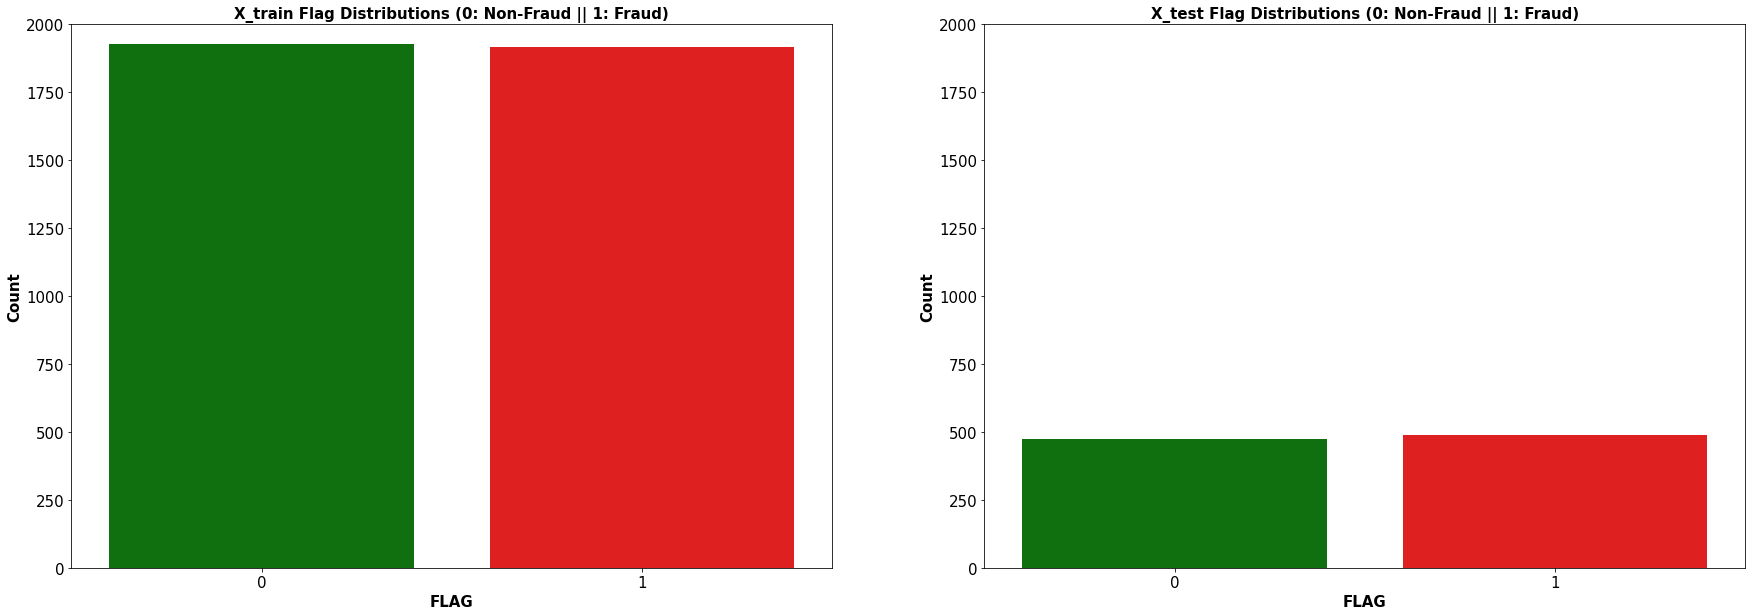

In [ ]:
# Plotting the sets

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
plt.subplot(1, 2, 1)
colors = ["green", "red"]
df_train = pd.DataFrame(y_train.value_counts())
ax = sns.countplot(y_train, data=df_train, palette=colors)
ax.set_ylim(0, 2000)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('FLAG', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('X_train Flag Distributions (0: Non-Fraud || 1: Fraud)', fontweight='bold', fontsize=15)

plt.subplot(1, 2, 2)
colors = ["green", "red"]
df_train = pd.DataFrame(y_test.value_counts())
ax = sns.countplot(y_test, data=df_train, palette=colors)
ax.set_ylim(0, 2000)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
plt.xlabel('FLAG', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)
plt.title('X_test Flag Distributions (0: Non-Fraud || 1: Fraud)', fontweight='bold', fontsize=15)

print("After", program_name, ":")
print("X_train:")
print('No Frauds', round(y_train.value_counts()[0]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[0])
print('Frauds', round(y_train.value_counts()[1]/len(y_train) * 100,2), '% of the dataset:', y_train.value_counts()[1])
print("")
print("X_test:")
print('No Frauds', round(y_test.value_counts()[0]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[0])
print('Frauds', round(y_test.value_counts()[1]/len(y_test) * 100,2), '% of the dataset:', y_test.value_counts()[1])
print("")

plt.show()

In [ ]:
# mlp_best_result = MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
#               beta_2=0.999, early_stopping=False, epsilon=1e-08,
#               hidden_layer_sizes=(10, 24), learning_rate='constant',
#               learning_rate_init=0.09, max_fun=15000, max_iter=1500,
#               momentum=0.9, n_iter_no_change=80, nesterovs_momentum=True,
#               power_t=0.5, random_state=None, shuffle=True, solver='sgd',
#               tol=0.0001, validation_fraction=0.1, verbose=False,
#               warm_start=False)

In [ ]:
# svc_best_result = SVC(C=10.0, break_ties=False, cache_size=200, class_weight='balanced',
#     coef0=0.0, decision_function_shape='ovr', degree=1.0, gamma='scale',
#     kernel='rbf', max_iter=-1, probability=True, random_state=None,
#     shrinking=True, tol=0.001, verbose=False)

In [ ]:
# xgboost_best_result = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1.0, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=9,
#               min_child_weight=6.0, missing=None, n_estimators=100, n_jobs=1,
#               nthread=4, objective='binary:logistic', random_state=0,
#               reg_alpha=0.005, reg_lambda=1, scale_pos_weight=1.0, seed=27,
#               silent=None, subsample=0.7, verbosity=1)

In [ ]:
# rf_best_result = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
#                        criterion='gini', max_depth=30, max_features='auto',
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_impurity_split=None,
#                        min_samples_leaf=1, min_samples_split=10,
#                        min_weight_fraction_leaf=0.0, n_estimators=600,
#                        n_jobs=None, oob_score=False, random_state=0, verbose=0,
#                        warm_start=False)

In [ ]:
# Classifiers with default parameters
from sklearn import tree
mlp_best_result = MLPClassifier()
svc_best_result = SVC(probability=True)
xgboost_best_result = XGBClassifier()
rf_best_result = RandomForestClassifier()
#rf_best_result = tree.DecisionTreeClassifier()

In [ ]:
# Print results performance for all classifiers using Train and Test set
from sklearn.metrics import precision_recall_fscore_support as score

start_time = datetime.now() 

# With GA
#print("Best Classifiers:\n", mlp_best_result, "\n", svc_best_result, "\n", xgboost_best_result, "\n", rf_best_result, "\n")
classifiers = [mlp_best_result, 
               svc_best_result, 
               xgboost_best_result,
               rf_best_result]

# Without GA
#classifiers = [MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 100, 50), activation='relu', solver='sgd', max_iter=2000, learning_rate='constant'), 
#               SVC(kernel='linear', probability=True), 
#               XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
#               RandomForestClassifier(n_estimators=20, max_depth=None, min_samples_split=10, random_state=0)]

# Define a result table as a DataFrame
result_table_train = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table_train_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

result_table_test = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
result_table_test_f1 = pd.DataFrame(columns=['Classifiers', 'Accuracy', 'F1Score', 'AUC', 'AveragePrecisionRecall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)

# TRAIN set
    yproba = model.predict_proba(X_train)[::,1]
    fpr, tpr, _ = roc_curve(y_train,  yproba)
    auc = roc_auc_score(y_train, yproba)
    result_table_train = result_table_train.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("===========================================================================================")
    print("Classifier = ", cls)
    print("TRAIN SET")
    y_pred = cls.predict(X_train)
    print(confusion_matrix(y_train, y_pred))
    print(classification_report(y_train, y_pred))
    accuracy = accuracy_score(y_train, y_pred)
    f1score = f1_score(y_train, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_train, y_pred, average='weighted')
    print("Accuracy : ", accuracy)
    print("F1 Score : ", f1score)
    print("AUC : ", auc)
    print("Average Precision Recall: ", average_precision)
    print("")
    report = classification_report(y_train, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report_csv = pd.DataFrame(columns = [str(cls)[0:3]+'_TRAIN'])
    df_report_csv.to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    df_report.iloc[[0, 1, 4]].to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    #result_table_train2 = result_table_train2.append({'Classifiers':cls.__class__.__name__,
    result_table_train_f1 = result_table_train_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'F1Score':f1score, 
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)
    
    precision, recall, fscore, support = score(y_train, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    specificity = tn / (tn+fp)
    print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    print('Precision: {}'.format(np.round(precision * 100, 2)))
    print('Fscore: {}'.format(np.round(fscore * 100, 2)))

# TEST set
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table_test = result_table_test.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)
    
    print("TEST SET")
    y_pred = cls.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred, pos_label=1, average='macro')
    average_precision = average_precision_score(y_test, y_pred, average='weighted')
    print("Accuracy : ", accuracy)
    print("F1 Score : ", f1score)
    print("AUC : ", auc)
    print("Average Precision Recall: ", average_precision)
    print("")
    report = classification_report(y_test, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()
    df_report_csv = pd.DataFrame(columns = [str(cls)[0:3]+'_TEST'])
    df_report_csv.to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    df_report.iloc[[0, 1, 4]].to_csv("{}_result.csv".format(program_name), sep=',', mode='a', index=True)
    result_table_test_f1 = result_table_test_f1.append({'Classifiers':str(cls)[0:3],
                                        'Accuracy':accuracy, 
                                        'F1Score':f1score, 
                                        'AUC':auc, 
                                        'AveragePrecisionRecall':average_precision}, ignore_index=True)
    
    precision, recall, fscore, support = score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn+fp)
    print('Accuracy: {}'.format(np.round(accuracy * 100, 2)))
    print('Sensitivity: {}'.format(np.round(recall * 100, 2)))
    print('Specificity: {}'.format(np.round(specificity * 100, 2)))
    print('Precision: {}'.format(np.round(precision * 100, 2)))
    print('Fscore: {}'.format(np.round(fscore * 100, 2)))
    
# Set name of the classifiers as index labels
result_table_train.set_index('classifiers', inplace=True)
#result_table_train_f1.set_index('Classifiers', inplace=True)

# Set name of the classifiers as index labels
result_table_test.set_index('classifiers', inplace=True)
#result_table_test_f1.set_index('Classifiers', inplace=True)

print('All Classifiers elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
print(mytime)

Classifier =  MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
TRAIN SET
[[1905   23]
 [ 108 1807]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1928
           1       0.99      0.94      0.97      1915

    accuracy                           0.97      3843
   macro avg       0.97      0.97      0.97      3843
weighted avg       0.97      0.97      0.97      3843

Accuracy :  0.965912047879261
F1 Score :  0.965889866180366
AUC :  0.9890921746855464
Average Pr

In [ ]:
# # Results performance bar plot

# color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
# # #FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# # Function plotting the results
# def plot_result(result_table, result_set):
#   print('PSO', result_set, 'set result:\n', result_table)
#   fig, ax = plt.subplots(1, 4, figsize=(30, 5))
#   result_table = result_table[::-1]
#   y_pos = result_table.Classifiers

#   plt.subplot(1, 4, 1)
#   ax = plt.barh(y_pos, result_table.Accuracy, color = color)
#   plt.yticks(rotation=0)
#   plt.grid(True)
#   plt.xlim(0, 1)
#   plt.title('PSO {} set: Accuracy'.format(result_set))
#   i = 0
#   label = np.round(result_table.Accuracy.values, 2)
#   for p in ax.patches:
#     plt.text(round(p.get_x() + p.get_width())/2, p.get_y() + p.get_height()/1.7, label[i], fontsize=18)
#     i = i+1

#   plt.subplot(1, 4, 2)
#   plt.barh(y_pos, result_table.F1Score, color = color)
#   plt.yticks(rotation=0)
#   plt.grid(True)
#   plt.xlim(0, 1)
#   plt.title('PSO {} set: F1 Score'.format(result_set))
#   i = 0
#   label = np.round(result_table.F1Score.values, 2)
#   for p in ax.patches:
#     plt.text(round(p.get_x() + p.get_width())/2, p.get_y() + p.get_height()/1.7, label[i], fontsize=18)
#     i = i+1

#   plt.subplot(1, 4, 3)
#   plt.barh(y_pos, result_table.AUC, color = color)
#   plt.yticks(rotation=0)
#   plt.grid(True)
#   plt.xlim(0, 1)
#   plt.title('PSO {} set: AUC'.format(result_set))
#   i = 0
#   label = np.round(result_table.AUC.values, 2)
#   for p in ax.patches:
#     plt.text(round(p.get_x() + p.get_width())/2, p.get_y() + p.get_height()/1.7, label[i], fontsize=18)
#     i = i+1
  
#   plt.subplot(1, 4, 4)
#   plt.barh(y_pos, result_table.AveragePrecisionRecall, color = color)
#   plt.yticks(rotation=0)
#   plt.grid(True)
#   plt.xlim(0, 1)
#   plt.title('PSO {} set: Average Precision Recall'.format(result_set))
#   i = 0
#   label = np.round(result_table.AveragePrecisionRecall.values, 2)
#   for p in ax.patches:
#     plt.text(round(p.get_x() + p.get_width())/2, p.get_y() + p.get_height()/1.7, label[i], fontsize=18)
#     i = i+1
#   plt.show()
#   print("")

# plot_result(result_table_train_f1, "Train")
# plot_result(result_table_test_f1, "Test")

PSO Train set result:
              Accuracy   F1Score       AUC  AveragePrecisionRecall
Classifiers                                                      
MLP          0.965912  0.965890  0.989092                0.959847
SVC          0.795472  0.786232  0.980063                0.794084
XGB          0.980224  0.980213  0.995127                0.980090
Ran          1.000000  1.000000  1.000000                1.000000


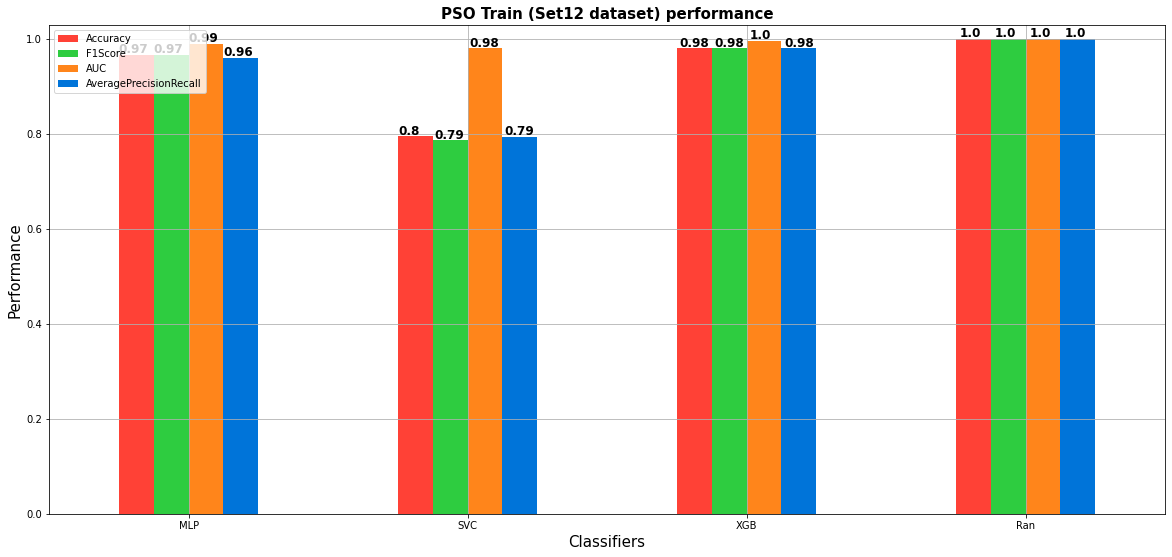


PSO Test set result:
              Accuracy   F1Score       AUC  AveragePrecisionRecall
Classifiers                                                      
MLP          0.932362  0.932296  0.961566                0.923281
SVC          0.783559  0.774264  0.981296                0.789336
XGB          0.959417  0.959411  0.984314                0.953434
Ran          0.967742  0.967740  0.988522                0.963510


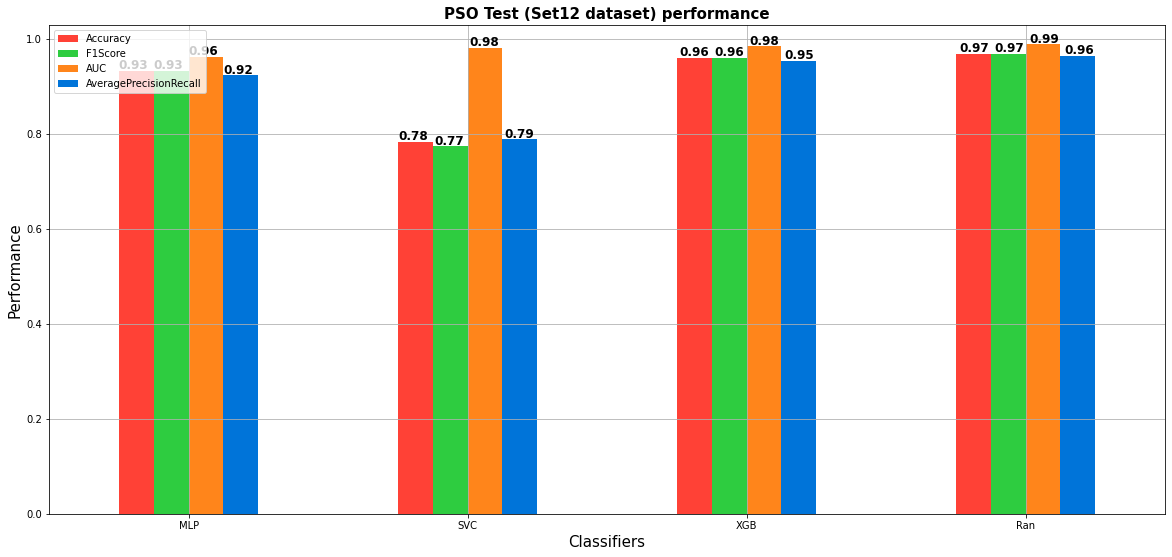

In [ ]:
# Results performance bar plot

color = ('#FF4136', '#2ECC40', '#FF851B', '#0074D9')
#FF851B orange, #FF4136 red, #0074D9, blue, #2ECC40 green)

# Function plotting the results performance
def plot_result(result_table, result_set):
  result_table = result_table.set_index('Classifiers')
  print(program_name, result_set, 'set result:\n', result_table)
  #ax = result_table.loc[:,['Accuracy','F1Score', 'AUC', 'AveragePrecisionRecall']].plot.bar(color=color, figsize=(20, 9))
  ax = result_table.plot.bar(color=color, figsize=(20, 9))
  plt.xticks(rotation=0)
  plt.ylabel("Performance", fontsize=15)
  plt.xlabel("Classifiers", fontsize=15)
  plt.ylim(0, 1.03)
  plt.grid(True)
  plt.legend(loc=2)
  plt.title('{} {} ({} dataset) performance'.format(program_name, result_set, dataset_set), fontweight='bold', fontsize=15)
  
  i = 0
  label = np.round(result_table.Accuracy.values, 2)
  for p in ax.patches:
      ax.annotate(str(round(p.get_height(),2 )), (p.get_x() * 1.005, p.get_height() * 1.005), fontweight='bold', fontsize=12)
      i = i+1

  plt.show()            
  print("")

plot_result(result_table_train_f1, "Train")
plot_result(result_table_test_f1, "Test")

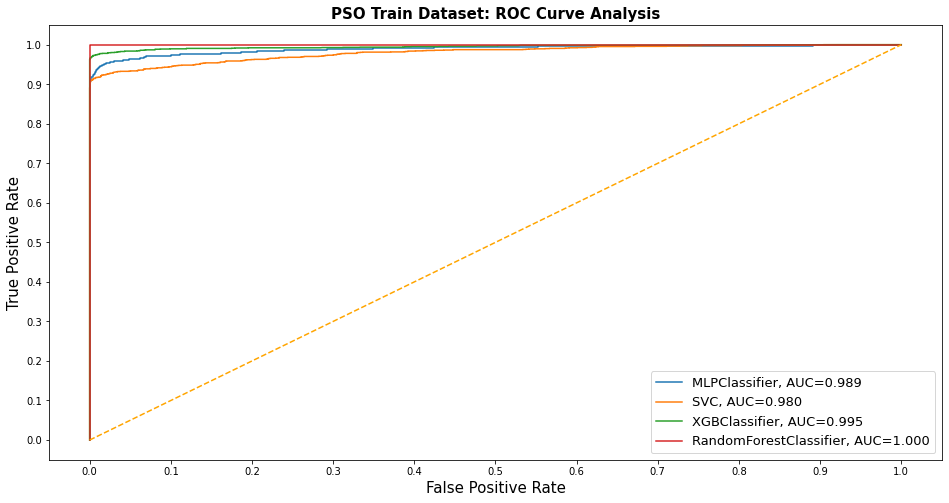

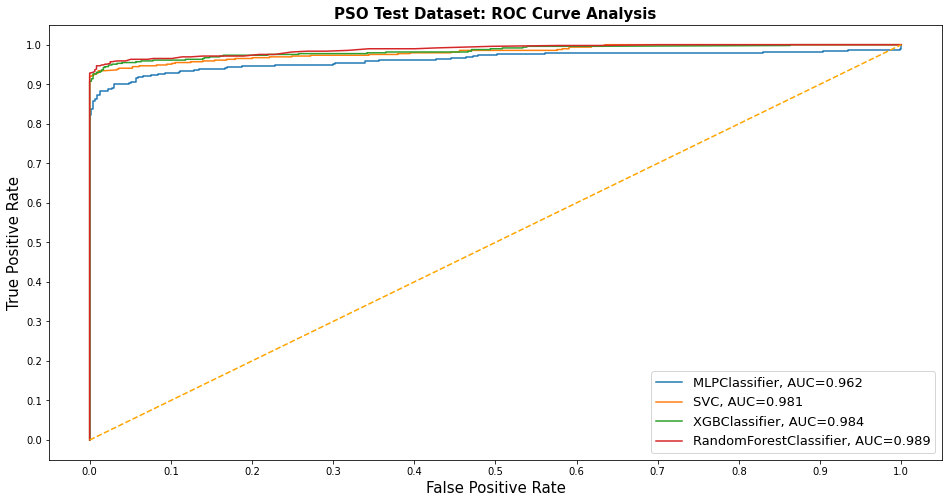

In [ ]:
# Plotting ROC/AUC

# Function plotting AUC
def plot_roc(result_table, result_set):
  fig1 = plt.figure(1, figsize=(16,8))
  for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
  plt.plot([0,1], [0,1], color='orange', linestyle='--')
  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)
  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)
  #plt.title('{} {} ({} dataset): ROC Curve Analysis'.format(program_name, result_set, dataset_set), fontweight='bold', fontsize=15)
  plt.title('PSO {} Dataset: ROC Curve Analysis'.format(result_set), fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  plt.show()
  #fig.savefig('multiple_roc_curve.png')

plot_roc(result_table_train, "Train")
plot_roc(result_table_test, "Test")

In [ ]:
print('TOTAL elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - first_start_time))
print(mytime)
print("ALL DONE")

TOTAL elapsed (hh:mm:ss.ms) 0:41:45.305616
2020-06-14 09:19:18.321281+08:00
ALL DONE
